In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from typing import Optional

In [2]:
def load_data_to_data_frame(file_path:str)->Optional[DataFrame]:
  '''
  Load data from a local file path.
  Args:
      - file_path (str): The path to the file to be loaded
  Returns:
      - Optimal[DataFrame]: A panda DataFrame containing the loaded data
  '''
  try:
    df = pd.read_csv(file_path)
    return df
  except:
    print("Error loading data")
    return None

In [3]:
df = load_data_to_data_frame('../data/laptops.csv')

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [69]:
list(df.columns)

['laptop',
 'status',
 'brand',
 'model',
 'cpu',
 'ram',
 'storage',
 'storage_type',
 'gpu',
 'screen',
 'touch',
 'final_price']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
def standardize_column_names(df:DataFrame)->DataFrame:
    '''
    Standardize the column names of a DataFrame
    Args:
        df (DataFrame): The DataFrame to standardize the column names
    Returns:
        DataFrame: The DataFrame with standardized column names
    '''
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [6]:
df = standardize_column_names(df)
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
columns = ['ram','storage','screen','final_price']  # columns to be used for analysis

In [8]:
data = df[columns]

In [9]:
data.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


### Question 1. There's one column with missing values. What is it?


In [11]:
def count_missing_values(df:DataFrame)->int:
    '''
    Count the number of missing values in each column of a DataFrame
    Args:
        df (DataFrame): The DataFrame to count the missing values
    Returns:
        int: The number of columns with missing values.
    '''
    missing_value_count = df.isnull().sum()
    count_with_missing = missing_value_count[missing_value_count > 0]
    return count_with_missing
print(f'Column with missing value is:{count_missing_values(data[columns])}')


Column with missing value is:screen    4
dtype: int64


### Question 2.What's the median (50% percentile) for variable 'ram'?

In [12]:
def calculate_median(df:DataFrame,columns:str)->DataFrame:
    '''
    Calculate the median of a column in a DataFrame
    Args:
        df (DataFrame): The DataFrame to calculate the median
    Returns:
        DataFrame: The DataFrame with the median of the specified column
    '''
    median = df[columns].median()
    return median
print(f"The median (50%) of ram is:{calculate_median(data,'ram')}")

The median (50%) of ram is:16.0


#### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
  
**Options:**

- With 0
- With mean
- Both are equally good

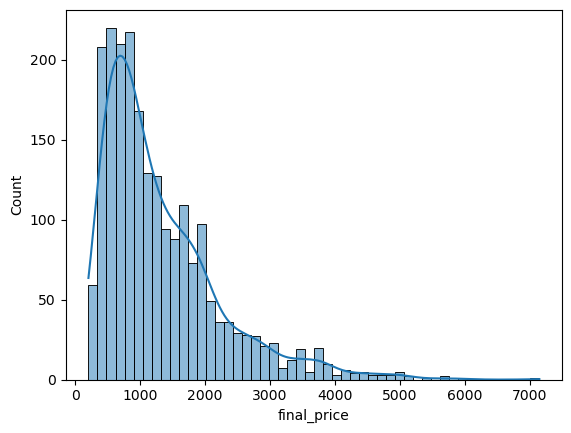

In [13]:
sns.histplot(data.final_price, bins=50, kde=True)
plt.show()

<Axes: xlabel='final_price', ylabel='Count'>

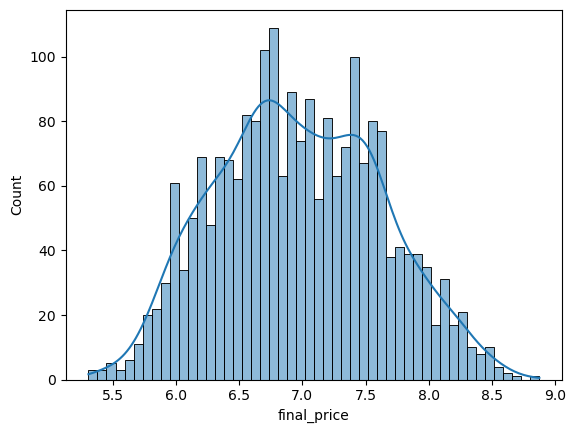

In [14]:
final_price_log = np.log1p(data.final_price)
sns.histplot(final_price_log, bins=50, kde=True)

In [15]:
n = len(data)
n

2160

In [16]:
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - n_test - n_val
n_test, n_val, n_train

(432, 432, 1296)

In [17]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train:n_train+n_val]
df_test = data.iloc[n_train+n_val:]

In [18]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

In [20]:
print(len(df_train), len(df_val), len(df_test))


1296 432 432


In [21]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [22]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [23]:
print(len(y_train), len(y_val), len(y_test))

1296 432 432


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 2079 to 796
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ram      1296 non-null   int64  
 1   storage  1296 non-null   int64  
 2   screen   1293 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 40.5 KB


In [26]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
def prep_x(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [42]:
def prep_x_mean(df,fill_value):
    df_num = df.fillna(fill_value)
    X = df_num.values
    return X  

In [32]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [29]:
w0,w = train_linear_regression(prep_x(df_train), y_train)
print(f'w0: {w0}, w: {w}')

w0: 6.7271637061128535, w: [ 0.02630589  0.00066041 -0.03651909]


In [46]:
X_val = prep_x(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.43

In [45]:
X_val = prep_x_mean(df_val,df_train.screen.mean())
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.43

In [47]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [72]:
X_null_train = prep_x(df_train)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [77]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(prep_x(df_train), y_train, r=r)
    y_null_reg_val = w_0 + prep_x(df_val).dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(f'r:{r}, w_0:{w_0}, rmse_val:{rmse_val}')

r:0, w_0:6.722879421950733, rmse_val:0.41
r:1e-06, w_0:6.722878596112091, rmse_val:0.41
r:0.0001, w_0:6.722796839087559, rmse_val:0.41
r:0.001, w_0:6.722053684994404, rmse_val:0.41
r:0.01, w_0:6.714631208859126, rmse_val:0.41
r:0.1, w_0:6.641301891693358, rmse_val:0.41
r:1, w_0:5.987729690345853, rmse_val:0.42
r:5, w_0:4.168960069201555, rmse_val:0.49
r:10, w_0:3.0255569232238284, rmse_val:0.57


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
  
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [62]:
data.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [65]:
check = ['ram','storage','screen']
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [ ]:
# Using the original target variables directly without log transformation
y_train = y_train_orig
y_val = y_val_orig
y_test = y_test_orig

# Then proceed with model training as usual
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Calculate RMSE without transforming the target
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [90]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    #y_train = np.log1p(y_train_orig)
    #y_val = np.log1p(y_val_orig)
    #y_test = np.log1p(y_test_orig)
    y_train = y_train_orig
    y_val = y_val_orig
    y_test = y_test_orig
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 547.5696230184078 565.45
1 594.4197427998473 636.8
2 649.4685454767654 588.96
3 571.9459040111591 597.81
4 629.3882030644552 571.96
5 580.7647373329519 573.24
6 783.768368990444 647.34
7 376.43586006222716 550.44
8 572.8852361197262 587.33
9 663.3792792606843 576.1


In [91]:
rmse_list

[565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]

In [92]:
RMS_sprterad = max(rmse_list) - min(rmse_list)
RMS_sprterad

96.89999999999998

In [93]:
np.round(np.std(rmse_list),3)

29.176

##### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
  
Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [80]:
data.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [94]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.final_price.values
y_test_orig = df_test.final_price.values

#y_train_val = np.log1p(y_train_val_orig)
# = np.log1p(y_test_orig)
y_train_val = y_train_val_orig
y_test = y_test_orig

del df_train_val['final_price']
del df_test['final_price']


In [95]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

608.61